In [1]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.model_selection import train_test_split #this is the function we need to split the data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

steps = pd.read_csv('steps.csv', delimiter=';')
survey = pd.read_csv('survey.csv')

steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
df = survey.merge(steps)

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


graphing distributions and showing summary statistics so analyzing can be done

In [4]:
df["mean_steps"] = df.loc[: , "20-6-2013":"13-5-2014"].mean(axis=1)

In [5]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [6]:
df = df[(df['mean_steps'] < 100000)&(df['mean_steps'] > 100)]

deleting steps that are too high or too low

In [7]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


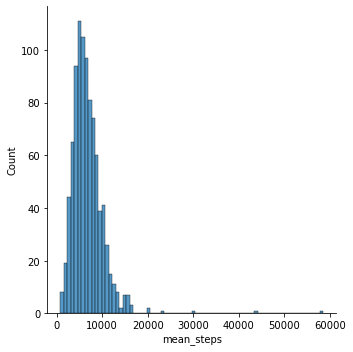

In [8]:
sns.displot(df["mean_steps"])

<AxesSubplot:xlabel='gender', ylabel='mean_steps'>

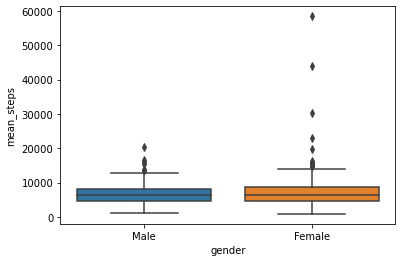

In [9]:
sns.boxplot(x="gender", y="mean_steps",data=df)

In [10]:
df["mean_steps"].max()

58491.06756756757

In [11]:
df["mean_steps"].min()

842.0

In [12]:
df["mean_steps"].mode()

0        842.000000
1       1032.500000
2       1210.000000
3       1218.500000
4       1289.555556
           ...     
918    20414.067039
919    22842.716846
920    30373.808917
921    43912.307692
922    58491.067568
Length: 923, dtype: float64

In [13]:
df["mean_steps"].median()

6245.006060606061

In [14]:
df["mean_steps"].std()

3691.658479354898

In [15]:
df["mean_steps"].mean()

6833.31941886296

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

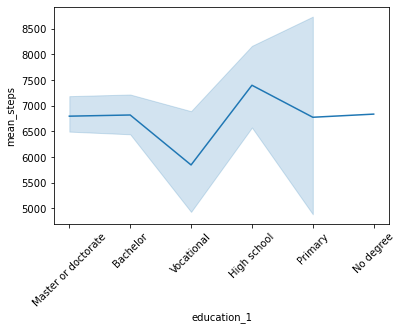

In [16]:
sns.lineplot(x="education_1", y="mean_steps", data=df)
plt.xticks(rotation=45)

There are two outliers the 4 and the 201722. These are so low and high that they are probably faulty data and should be deleted. (I did not succeed in deleting them) The mean of the steps is right-skewed. You can see that women have more high outliers from the boxplot. People with high school education have the highest mean steps. However if the two outliers are deleted these conclusions may be changed.

In [17]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
count,923.000000,923.000000,923.000000,922.000000,921.000000,23.000000,243.000000,278.000000,296.000000,354.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,923.000000
mean,464.984832,2.339112,2.528711,171.685466,72.843648,3537.304348,9034.724280,10889.636691,7402.847973,8110.370056,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,6833.319419
std,268.505585,1.222910,1.273793,9.095750,25.965016,4006.278430,6412.774483,6283.204309,6733.291773,5495.536639,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,3691.658479
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,842.000000
25%,232.500000,1.000000,1.000000,165.000000,61.000000,299.000000,4395.500000,6524.250000,2726.750000,4428.250000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,4639.427586
50%,464.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,6245.006061
75%,697.500000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,8377.778715
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,58491.067568


calculating BMI to show healthiness

In [18]:
df["heigthmeter"] =  df["height"]/100

In [19]:
df["heigth2"] = df["heigthmeter"] * df["heigthmeter"]

In [20]:
df["BMI"] = df["weight"] / df["heigth2"]

In [21]:
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,heigthmeter,heigth2,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,1.78,3.1684,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,1.80,3.2400,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,1.80,3.2400,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,1.78,3.1684,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,1.67,2.7889,21.872423


making a scatterplot matrix to compare all the numerical variables

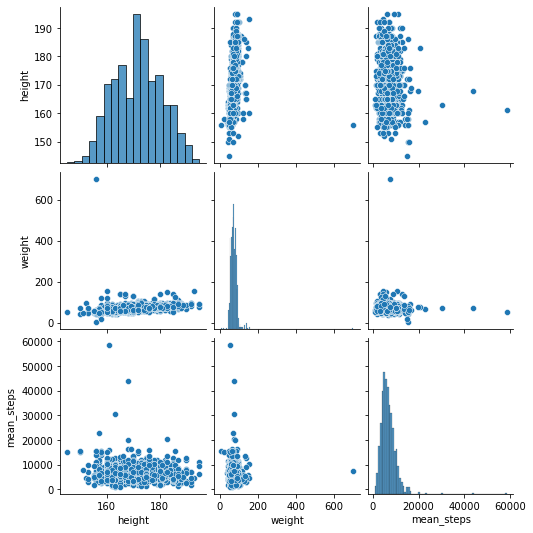

In [22]:
df_sel = df[["height","weight","mean_steps" ]]
sns.pairplot(df_sel)

making a correlation map

In [23]:
corr = df[["height", "weight", "mean_steps", "BMI", "education", "hh_size"]].corr()
corr

,height,weight,mean_steps,BMI,education,hh_size
height,1.000000,0.265449,-0.096757,-0.031630,-0.043137,-0.055669
weight,0.265449,1.000000,-0.049337,0.951352,0.028444,0.035931
mean_steps,-0.096757,-0.049337,1.000000,-0.018772,0.038810,0.033788
BMI,-0.031630,0.951352,-0.018772,1.000000,0.039764,0.051915
education,-0.043137,0.028444,0.038810,0.039764,1.000000,0.824738
hh_size,-0.055669,0.035931,0.033788,0.051915,0.824738,1.000000


making a heatmap to show the correlation in colors

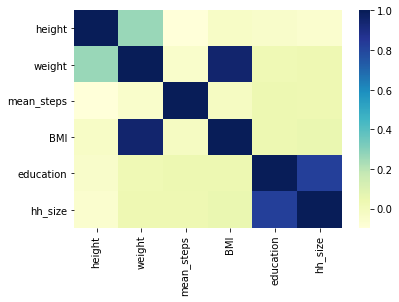

In [24]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
plt.show()

from the heatmap you can see that there is a small corellation between weigth and heigth, but there is no real correlation between mean steps and other variables

A big correlation can be found however between education and hh_size

The correlation between BMI and heigth and weigth is logical since weigth and heigth are used to determine BMI

In [25]:
df_sel = df[["mean_steps", "BMI", "hh_size", "education", "education_1", "gender", "age", "city"]]

Selecting only the needed columns. I removed all the date based ones, since the mean_steps is a simpler version. I also deleted height and weight since they are used in the BMI.

In [26]:
df_sel.head()

,mean_steps,BMI,hh_size,education,education_1,gender,age,city
0,10205.521212,30.930438,4,4,Master or doctorate,Male,25-34,Bordeaux
1,5687.423313,23.765432,1,3,Bachelor,Male,35-44,Lille
2,8301.729730,25.617284,2,2,Master or doctorate,Male,25-34,Montpellier
3,3633.200000,25.249337,1,1,Bachelor,Male,<25,Lyon
4,5312.129630,21.872423,3,4,Bachelor,Female,25-34,Montpellier


In [27]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 928
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mean_steps   923 non-null    float64
 1   BMI          920 non-null    float64
 2   hh_size      923 non-null    int64  
 3   education    923 non-null    int64  
 4   education_1  923 non-null    object 
 5   gender       923 non-null    object 
 6   age          923 non-null    object 
 7   city         923 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 97.2+ KB


mean steps and BMI have NaN so these should be deleted

In [28]:
df_sel.dropna()

,mean_steps,BMI,hh_size,education,education_1,gender,age,city
0,10205.521212,30.930438,4,4,Master or doctorate,Male,25-34,Bordeaux
1,5687.423313,23.765432,1,3,Bachelor,Male,35-44,Lille
2,8301.729730,25.617284,2,2,Master or doctorate,Male,25-34,Montpellier
3,3633.200000,25.249337,1,1,Bachelor,Male,<25,Lyon
4,5312.129630,21.872423,3,4,Bachelor,Female,25-34,Montpellier
...,...,...,...,...,...,...,...,...
924,6282.131868,21.671258,3,4,Master or doctorate,Female,45-54,Lille
925,4799.880000,24.414062,3,5,Bachelor,Male,<25,Lille
926,10030.326829,21.672110,2,2,Bachelor,Male,35-44,Montpellier
927,15679.679012,21.971336,1,1,High school,Female,55-64,Lille


In [29]:
df = df_sel

In [30]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

I imported this def because I kept getting this error after defining the lm: ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [31]:
df = pd.get_dummies(df_sel,columns=["education_1", "gender", "age", "city"],drop_first= True)
df.head()

,mean_steps,BMI,hh_size,education,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,gender_Male,age_35-44,age_45-54,age_55-64,age_65+,age_<25,city_Lille,city_Lyon,city_Montpellier
0,10205.521212,30.930438,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,5687.423313,23.765432,1,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,8301.729730,25.617284,2,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,3633.200000,25.249337,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,5312.129630,21.872423,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
clean_dataset(df)

,mean_steps,BMI,hh_size,education,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,gender_Male,age_35-44,age_45-54,age_55-64,age_65+,age_<25,city_Lille,city_Lyon,city_Montpellier
0,10205.521212,30.930438,4.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5687.423313,23.765432,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8301.729730,25.617284,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3633.200000,25.249337,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5312.129630,21.872423,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,6282.131868,21.671258,3.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
925,4799.880000,24.414062,3.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
926,10030.326829,21.672110,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
927,15679.679012,21.971336,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


using dummies to split up the categorical variables

In [33]:
X= df.loc[:, "BMI":"city_Montpellier"]
y = df["mean_steps"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=21)

In [35]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

creating the model and training it

In [36]:
import math
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

-0.06284377352752268

In [37]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2983.825653695753

calculating the predictive power of the model

the r2 means that 6 percent of the outcomes can be explained by the model

the RMSE means that the outcome is normally around 2984 steps of

The r2 is surprisingly low but this could because of the amount of variables used in the model

The big RMSE is high but this could also be the case because of the variables

In [38]:
df["steps_p"] = lm.predict(X)

In [39]:
df.head()

,mean_steps,BMI,hh_size,education,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,gender_Male,age_35-44,age_45-54,age_55-64,age_65+,age_<25,city_Lille,city_Lyon,city_Montpellier,steps_p
0,10205.521212,30.930438,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,6589.331458
1,5687.423313,23.765432,1,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,7032.599536
2,8301.729730,25.617284,2,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,5647.197579
3,3633.200000,25.249337,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,5344.177859
4,5312.129630,21.872423,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6303.729297


In [40]:
df["res"] = df["steps_p"] - df["mean_steps"]
df.head()

,mean_steps,BMI,hh_size,education,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,gender_Male,age_35-44,age_45-54,age_55-64,age_65+,age_<25,city_Lille,city_Lyon,city_Montpellier,steps_p,res
0,10205.521212,30.930438,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,6589.331458,-3616.189754
1,5687.423313,23.765432,1,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,7032.599536,1345.176224
2,8301.729730,25.617284,2,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,5647.197579,-2654.532151
3,3633.200000,25.249337,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,5344.177859,1710.977859
4,5312.129630,21.872423,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6303.729297,991.599668


adding the residuals

<AxesSubplot:xlabel='mean_steps', ylabel='steps_p'>

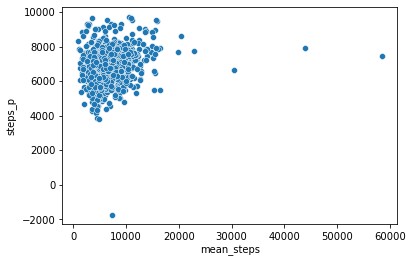

In [41]:
sns.scatterplot(x="mean_steps", y="steps_p", data=df)

I forgot how to make the line in this plot, but most points seem to be completely of. So the model is not good right now and should be altered by taking different variables. The residuals are also all very high.

Conclusion: This is a bad model right now